## Libraries

In [166]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
from scipy.io import loadmat
import tensorflow as tf
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import time

from sklearn.model_selection import train_test_split

## Données

In [167]:
file_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/file_list.mat')
file_lists = file_list['file_list']
annotation_list = file_list['annotation_list']
labels = file_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_lists]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_file_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_file_list.tail()

Image Path  \
20575  n02116738-African_hunting_dog/n02116738_9798.jpg   
20576  n02116738-African_hunting_dog/n02116738_9818.jpg   
20577  n02116738-African_hunting_dog/n02116738_9829.jpg   
20578  n02116738-African_hunting_dog/n02116738_9844.jpg   
20579  n02116738-African_hunting_dog/n02116738_9924.jpg   

                                         Annotation  Label  
20575  n02116738-African_hunting_dog/n02116738_9798    120  
20576  n02116738-African_hunting_dog/n02116738_9818    120  
20577  n02116738-African_hunting_dog/n02116738_9829    120  
20578  n02116738-African_hunting_dog/n02116738_9844    120  
20579  n02116738-African_hunting_dog/n02116738_9924    120

In [168]:
df_file_list.shape

(20580, 3)

In [169]:
df_file_list.value_counts('Label')

Label
3      252
10     239
27     232
108    219
89     218
      ... 
71     150
101    150
83     150
4      149
18     148
Name: count, Length: 120, dtype: int64

In [170]:
df_file_list['Label']

0          1
1          1
2          1
3          1
4          1
        ... 
20575    120
20576    120
20577    120
20578    120
20579    120
Name: Label, Length: 20580, dtype: uint8

In [171]:
train_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/train_list.mat')
file_list = train_list['file_list']
annotation_list = train_list['annotation_list']
labels = train_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_train_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_train_list.head()

Image Path  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation  Label  
0   n02085620-Chihuahua/n02085620_5927      1  
1   n02085620-Chihuahua/n02085620_4441      1  
2   n02085620-Chihuahua/n02085620_1502      1  
3   n02085620-Chihuahua/n02085620_1916      1  
4  n02085620-Chihuahua/n02085620_13151      1

In [172]:
df_train_list.shape

(12000, 3)

In [173]:
train_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/train_data.mat')
train_info = train_data['train_info']
# annotation_list = train_data['train_fg_data']
# labels = train_data['train_data']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in train_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in train_info['annotation_list'][0][0]]
labels = [label[0] for label in train_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in train_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_train_data = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Afficher le DataFrame
df_train_data.head()

Image Path  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation  Label  \
0   n02085620-Chihuahua/n02085620_5927      1   
1   n02085620-Chihuahua/n02085620_4441      1   
2   n02085620-Chihuahua/n02085620_1502      1   
3   n02085620-Chihuahua/n02085620_1916      1   
4  n02085620-Chihuahua/n02085620_13151      1   

                                               FG ID  
0  histograms_spm/n02085620-Chihuahua/n02085620_5...  
1  histograms_spm/n02085620-Chihuahua/n02085620_4...  
2  histograms_spm/n02085620-Chihuahua/n02085620_1...  
3  histograms_spm/n02085620-Chihuahua/n02085620_1...  
4  histograms_spm/n02085620-Chihuahua/n02085620_1...

In [174]:
df_train_data.shape

(12000, 4)

In [175]:
test_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/test_list.mat')
file_list = test_list['file_list']
annotation_list = test_list['annotation_list']
labels = test_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_test_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_test_list.head()

Image Path                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1

In [176]:
df_test_list.shape

(8580, 3)

In [177]:
test_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/test_data.mat')
test_info = test_data['test_info']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in test_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in test_info['annotation_list'][0][0]]
labels = [label[0] for label in test_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in test_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_test_info = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Affichage du DataFrame
df_test_info.head()

Image Path                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

   Label                                              FG ID  
0      1  histograms_spm/n02085620-Chihuahua/n02085620_2...  
1      1  histograms_spm/n02085620-Chihuahua/n02085620_4...  
2      1  histograms_spm/n02085620-Chihuahua/n02085620_1...  
3      1  histograms_spm/n02085620-Chihuahua/n02085620_3...  
4      1  histograms_spm/n02085620-Chihuahua/n02085620_1...

In [178]:
df_test_info.shape

(8580, 4)

In [179]:
base_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/'  # Le répertoire contenant les images

# Parcourir les chemins des images et les charger
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    image = Image.open(full_path)
    #image.show()  # Afficher l'image

In [180]:
len(df_file_list['Label'])

20580

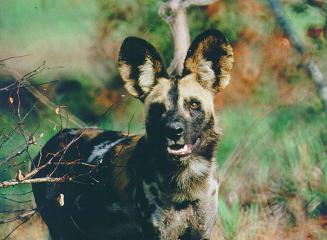

In [181]:
image

## Preprocessing des images

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image non trouvée à {image_path}")
        return None

    # Conversion de l'image en RGB pour les traitements ultérieurs
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Étape 1 : Blanchiment (centrage) avec TensorFlow
    image = tf.image.convert_image_dtype(img, tf.float32)  # Convertit l'image en flottant [0, 1]
    image_whitened = tf.image.per_image_standardization(image)  # Applique le blanchiment

    # Conversion de l'image blanchie en tableau NumPy compatible avec OpenCV
    img_whitened_np = image_whitened.numpy()

    # Étape 2 : Égalisation de l'histogramme sur les niveaux de gris
    img_gray = cv2.cvtColor((img_whitened_np * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    img_equalized = cv2.equalizeHist(img_gray)

    # Étape 3 : Redimensionnement
    img_resized = cv2.resize(img_equalized, target_size)

    # Ajout de la dimension de canal (1 pour niveaux de gris ou 3 pour RGB)
    img_final = np.expand_dims(img_resized, axis=-1)  # (224, 224, 1)

    return img_final

In [183]:
# Appliquer le prétraitement à chaque image
preprocessed_images = []
for path in df_file_list['Image Path']:
    full_path = os.path.join('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/', path)
    preprocessed_img = preprocess_image(full_path, target_size=(224, 224))
    if preprocessed_img is not None:
        preprocessed_images.append(preprocessed_img)
    else:
        print(f"Image non traitée : {full_path}")

# Optionnel : Affichage des informations
print("Prétraitement terminé pour toutes les images.")
df_file_list.head()

Prétraitement terminé pour toutes les images.


Image Path  \
0  n02085620-Chihuahua/n02085620_10074.jpg   
1  n02085620-Chihuahua/n02085620_10131.jpg   
2  n02085620-Chihuahua/n02085620_10621.jpg   
3   n02085620-Chihuahua/n02085620_1073.jpg   
4  n02085620-Chihuahua/n02085620_10976.jpg   

                            Annotation  Label  
0  n02085620-Chihuahua/n02085620_10074      1  
1  n02085620-Chihuahua/n02085620_10131      1  
2  n02085620-Chihuahua/n02085620_10621      1  
3   n02085620-Chihuahua/n02085620_1073      1  
4  n02085620-Chihuahua/n02085620_10976      1

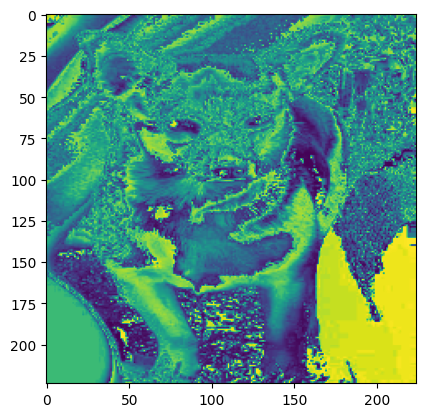

In [184]:
plt.imshow(preprocessed_images[0])

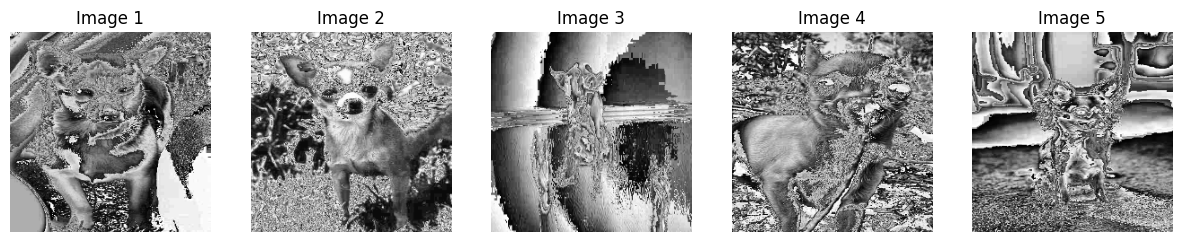

In [ ]:
# Affichage des 5 premières images prétraitées
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Utilisez cmap='gray' si les images sont en niveaux de gris
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()

## Transfert Learning

Je ne prends que 3 classes:
- Maltese_dog : classe 3
- Afghan_hound : classe 10
- Scottish_deerhound : classe 27

In [ ]:
# Filtrer pour ne garder que les lignes avec les labels 3, 10, ou 27
filtered_df = df_file_list[df_file_list['Label'].isin([3, 10, 27])]
filtered_df.shape

(723, 3)

In [187]:
df_by_label = filtered_df.groupby('Label').head(1)
# Afficher les chemins des images et les annotations pour les labels filtrés
for index, row in df_by_label.iterrows():
    print(f"Image Path: {row['Image Path']}, Annotation (Label): {row['Label']}")

Image Path: n02085936-Maltese_dog/n02085936_10073.jpg, Annotation (Label): 3
Image Path: n02088094-Afghan_hound/n02088094_1003.jpg, Annotation (Label): 10
Image Path: n02092002-Scottish_deerhound/n02092002_10060.jpg, Annotation (Label): 27


In [188]:
labels = df_by_label['Label'].unique().tolist()
labels

[3, 10, 27]

In [189]:
# Appliquer le prétraitement à chaque image
preprocessed_images = []
for path in filtered_df['Image Path']:
    full_path = os.path.join('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/', path)
    preprocessed_img = preprocess_image(full_path, target_size=(224, 224))
    if preprocessed_img is not None:
        preprocessed_images.append(preprocessed_img)
    else:
        print(f"Image non traitée : {full_path}")

# Optionnel : Affichage des informations
print("Prétraitement terminé pour toutes les images.")
filtered_df.head()

Prétraitement terminé pour toutes les images.


Image Path  \
337  n02085936-Maltese_dog/n02085936_10073.jpg   
338  n02085936-Maltese_dog/n02085936_10130.jpg   
339  n02085936-Maltese_dog/n02085936_10148.jpg   
340  n02085936-Maltese_dog/n02085936_10197.jpg   
341  n02085936-Maltese_dog/n02085936_10199.jpg   

                                Annotation  Label  
337  n02085936-Maltese_dog/n02085936_10073      3  
338  n02085936-Maltese_dog/n02085936_10130      3  
339  n02085936-Maltese_dog/n02085936_10148      3  
340  n02085936-Maltese_dog/n02085936_10197      3  
341  n02085936-Maltese_dog/n02085936_10199      3

Forme de l'image d'entrée :  (224, 224, 1)
Valeurs des pixels :  0 255
Forme de l'image d'entrée :  (224, 224, 1)
Valeurs des pixels :  0 255
Forme de l'image d'entrée :  (224, 224, 1)
Valeurs des pixels :  0 255
Forme de l'image d'entrée :  (224, 224, 1)
Valeurs des pixels :  0 255
Forme de l'image d'entrée :  (224, 224, 1)
Valeurs des pixels :  0 255


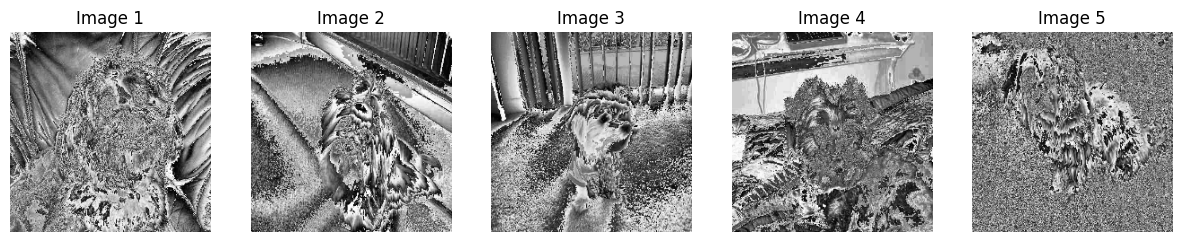

In [190]:
# Affichage des 5 premières images prétraitées
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Utilisez cmap='gray' si les images sont en niveaux de gris
     # Afficher les informations pour le débogage
    print("Forme de l'image d'entrée : ", preprocessed_images[i].shape)
    print("Valeurs des pixels : ", preprocessed_images[i].min(), preprocessed_images[i].max())
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()

## Prétraitement des données

### Chargement des données

In [191]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/'
validation_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/'
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                             validation_split=0.2,
                                                             subset="training",
                                                             seed=123, shuffle=True, 
                                                             batch_size=BATCH_SIZE, 
                                                             image_size=IMG_SIZE)

Found 723 files belonging to 3 classes.
Using 579 files for training.


In [192]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                seed=123,
                                                                shuffle=True,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)

Found 723 files belonging to 3 classes.
Using 144 files for validation.


2024-11-22 16:45:27.618233: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


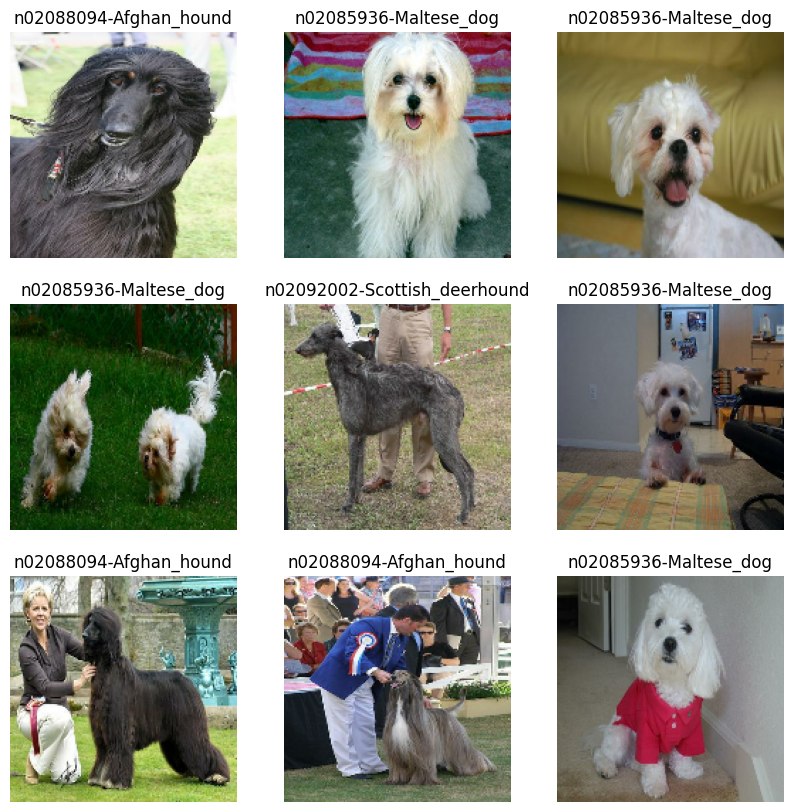

In [193]:
#Afficher les neuf premières images et étiquettes de l'ensemble d'entraînement
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
 
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Afficher les informations pour le débogage
print("Forme de l'image d'entrée : ", images[i].shape)
# Convertir en NumPy array pour accéder aux méthodes .min() et .max()
img_array_np = images[i].numpy()
print("Valeurs des pixels : ", img_array_np.min(), img_array_np.max())

Forme de l'image d'entrée :  (160, 160, 3)
Valeurs des pixels :  0.0 221.43066


In [195]:
class_names

['n02085936-Maltese_dog',
 'n02088094-Afghan_hound',
 'n02092002-Scottish_deerhound']

In [196]:
# Comme le jeu de données d'origine ne contient pas de jeu de test, en créer un. 
# Pour ce faire, déterminer le nombre de lots de données disponibles dans l'ensemble de validation à l'aide tf.data.experimental.cardinality , 
# puis déplacer 25 % d'entre eux vers un ensemble de test.
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 4)
validation_dataset = validation_dataset.skip(val_batches // 4)

In [197]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 1


### Configurer l'ensemble de données pour les performances

In [198]:
# Utiliser la prélecture tamponnée pour charger des images à partir du disque sans que les E/S ne deviennent bloquantes
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Augmentation des données

Lorsqu'on ne dispose pas d'un grand ensemble de données d'images, il est recommandé d'introduire artificiellement la diversité des échantillons en appliquant des transformations aléatoires, mais réalistes, aux images d'entraînement, telles que la rotation et le retournement horizontal. Cela permet d'exposer le modèle à différents aspects des données d'apprentissage et de réduire le surajustement

In [199]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Appliquons plusieurs fois ces calques à la même image et voyons le résultat.



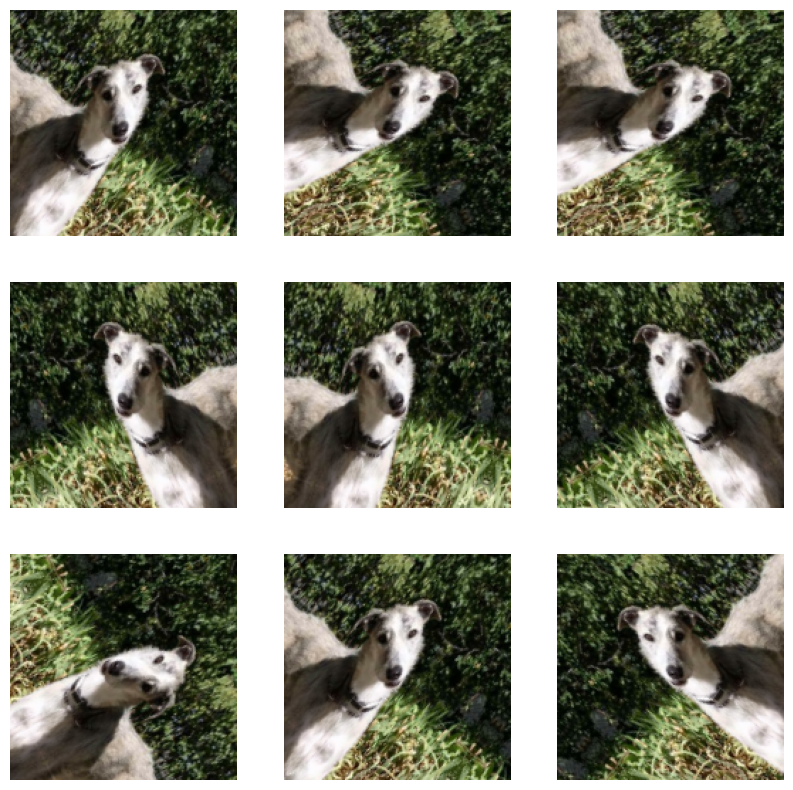

In [200]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

### Redimensionner les valeurs de pixel

Télécharger tf.keras.applications.MobileNetV2 pour l'utiliser comme modèle de base. Ce modèle attend des valeurs de pixel dans [-1, 1] , mais à ce stade, les valeurs de pixel des images sont dans [0, 255] . Pour les redimensionner, utiliser la méthode de prétraitement incluse avec le modèle 
ou redimensionner les valeurs de pixel de [0, 255] à [-1, 1] en utilisant tf.keras.layers.Rescaling .

In [201]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [202]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

## Créer le modèle de base à partir des convnets pré-formés

Créer le modèle de base à partir du modèle MobileNet V2 développé chez Google, pré-formé sur le jeu de données ImageNet, un grand jeu de données composé de 1,4 million d'images et de 1000 classes. ImageNet est un ensemble de données de formation à la recherche avec une grande variété de catégories comme le jackfruit et la syringe . Cette base de connaissances nous aidera à classer les chiens à partir de notre ensemble de données spécifique.

Instancier un modèle MobileNet V2 préchargé avec des pondérations formées sur ImageNet. En spécifiant l'argument include_top=False , cela charge un réseau qui n'inclut pas les couches de classification en haut, ce qui est idéal pour l'extraction d'entités.

In [203]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Cet extracteur de fonctionnalités convertit chaque image 160x160x3 en un bloc de fonctionnalités 5x5x1280 . Voyons ce que cela fait à un exemple de lot d'images

In [204]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Extraction de caractéristiques

### Geler la base convolutive

Il est important de geler la base convolutive avant de compiler et d'entraîner le modèle. Le gel (en définissant layer.trainable = False) empêche les poids d'une couche donnée d'être mis à jour pendant l'entraînement. trainable V2 comporte de nombreuses couches, donc définir l'indicateur d'apprentissage de l'ensemble du modèle sur False les gèlera toutes.

In [205]:
base_model.trainable = False

### Les couches BatchNormalization

Lorsqu'on définit layer.trainable = False , la couche BatchNormalization s'exécute en mode d'inférence et ne met pas à jour ses statistiques de moyenne et de variance.

Lorsqu'on libére un modèle qui contient des couches BatchNormalization afin d'effectuer un réglage fin, il faut conserver les couches BatchNormalization en mode inférence en transmettant training = False lors de l'appel du modèle de base. Sinon, les mises à jour appliquées aux poids non entraînables détruiront ce que le modèle a appris.

In [206]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

### Ajouter une tête de classement

Pour générer des prédictions à partir du bloc d'entités, effectuer une moyenne sur les emplacements spatiaux 5x5 , à l'aide d'une couche tf.keras.layers.GlobalAveragePooling2D pour convertir les entités en un seul vecteur de 1 280 éléments par image.

In [207]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Appliquer une couche tf.keras.layers.Dense pour convertir ces fonctionnalités en une seule prédiction par image. Il n'y a pas besoin d'une fonction d'activation ici car cette prédiction sera traitée comme un logit ou une valeur de prédiction brute.

In [208]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


Construire un modèle en enchaînant les couches d'augmentation de données, de redimensionnement, base_model et d'extracteur de caractéristiques à l'aide de l' API fonctionnelle Keras . Comme mentionné précédemment, utiliser training=False car notre modèle contient une couche BatchNormalization .




In [209]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

### Compiler le modèle

Compiler le modèle avant de l'entraîner. il existe 3 classes, utiliser la perte tf.keras.losses.SparseCategoricalCrossentropy avec from_logits=False.

In [210]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [211]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Les 2,5 millions de paramètres dans MobileNet sont gelés, mais il y a 3,8 mille paramètres pouvant être entraînés dans la couche Dense. Ceux-ci sont répartis entre deux objets tf.Variable , les poids et les biais.



In [212]:
len(model.trainable_variables)

2

### Former le modèle

In [213]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.1994 - loss: 7.0314


In [214]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 7.04
initial accuracy: 0.20


In [215]:
start_time_fit = time.time() # en secondesepochs=10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)
time_fit = (time.time() - start_time_fit)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.3119 - loss: 6.1976 - val_accuracy: 0.2857 - val_loss: 5.3971
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.3253 - loss: 5.0609 - val_accuracy: 0.3571 - val_loss: 3.2484
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.3553 - loss: 4.0078 - val_accuracy: 0.4286 - val_loss: 2.0737
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.3990 - loss: 2.7007 - val_accuracy: 0.4286 - val_loss: 2.5710
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3810 - loss: 2.3772 - val_accuracy: 0.4107 - val_loss: 2.5346
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.3865 - loss: 2.1171 - val_accuracy: 0.3839 - val_loss: 2.1702
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.3782 - loss: 1.9174 - val_accuracy: 0.3929 - val_loss: 1.8791
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.4173 - loss: 1.5606 - val_accuracy: 0.

In [216]:
print("Temps d'entraînement:", time_fit)

Temps d'entraînement: 23.88001298904419


### Courbes d'apprentissage

Examinons les courbes d'apprentissage de la précision/perte de formation et de validation lors de l'utilisation du modèle de base MobileNetV2 comme extracteur de caractéristiques fixes.

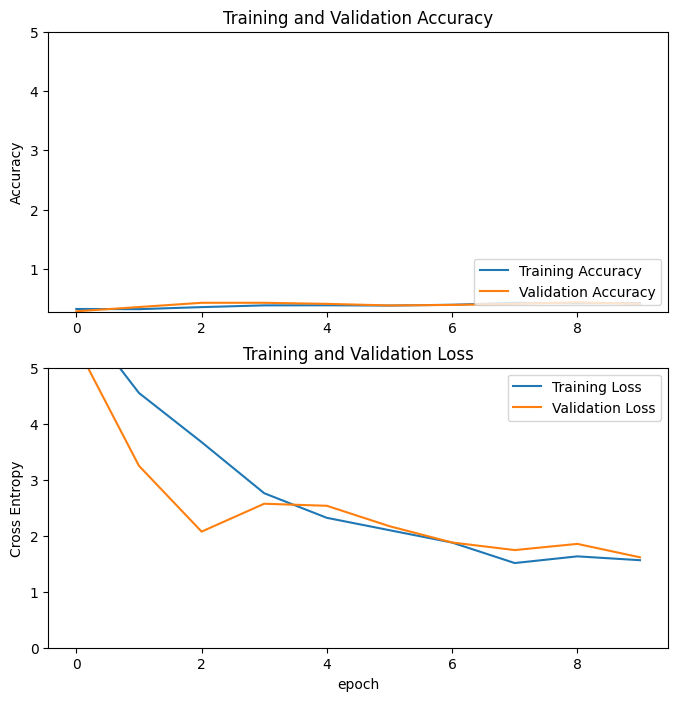

In [217]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),5])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Dégeler les couches supérieures du modèle

Dégeler le base_model de base et définir les couches inférieures pour qu'elles ne puissent pas être formées. Ensuite, recompiler le modèle (nécessaire pour que ces modifications prennent effet) et reprendre la formation.

In [218]:
base_model.trainable = True

In [219]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compiler le modèle

Comme on entraîne un modèle beaucoup plus grand et qu'on veut réadapter les poids pré-entraînés, il est important d'utiliser un taux d'apprentissage inférieur à ce stade. Sinon, notre modèle pourrait se suradapter très rapidement.

In [220]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [221]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 1,865,283 (7.12 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [222]:
len(model.trainable_variables)

56

## Formation du modèle

Cette étape améliorera notre précision de quelques points de pourcentage

In [223]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

start_time_fit = time.time() # en secondesepochs=10
history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

time_fit = (time.time() - start_time_fit)

Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.3519 - loss: 1.2516 - val_accuracy: 0.4732 - val_loss: 1.5055
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.3423 - loss: 1.3607 - val_accuracy: 0.4911 - val_loss: 1.3729
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.3687 - loss: 1.3468 - val_accuracy: 0.5089 - val_loss: 1.4779
Epoch 13/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.4053 - loss: 1.4592 - val_accuracy: 0.5179 - val_loss: 1.3514
Epoch 14/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.4111 - loss: 1.4608 - val_accuracy: 0.5446 - val_loss: 1.1209
Epoch 15/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.4077 - loss: 1.3640 - val_accuracy: 0.5357 - val_loss: 0.9809
Epoch 16/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.4203 - loss: 1.2395 - val_accuracy: 0.5536 - val_loss: 0.9809
Epoch 17/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.4469 - loss: 1.2286 - val_accu

In [224]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

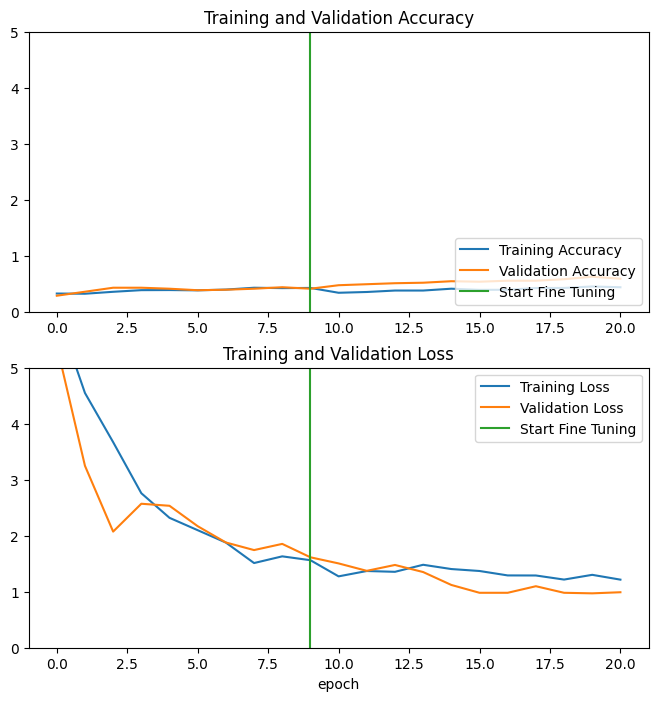

In [225]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 5])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 5])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Évaluation et prédiction

Vérifier les performances du modèle sur de nouvelles données à l'aide d'un ensemble de tests.



In [226]:
start_time_test = time.time() # en secondes
test_loss, test_accuracy = model.evaluate(test_dataset)
time_test = (time.time() - start_time_test)

print('Test accuracy :', test_accuracy)
print('Test loss :', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6250 - loss: 1.0300
Test accuracy : 0.625
Test loss : 1.0299503803253174


In [227]:
print("Temps d'entraînement:", time_fit)
print("Temps de test:", time_test)

Temps d'entraînement: 39.96851205825806
Temps de test: 0.17633414268493652


Probabilités par classe :
 [[0.54771507 0.19031125 0.26197374]
 [0.654346   0.22576647 0.11988752]
 [0.36026603 0.11796124 0.5217727 ]
 [0.256839   0.52253324 0.2206277 ]
 [0.7982271  0.16982318 0.03194982]
 [0.35261494 0.32166445 0.3257206 ]
 [0.20863295 0.26435882 0.5270083 ]
 [0.5546134  0.0948602  0.35052636]
 [0.6967477  0.15619417 0.14705814]
 [0.67762125 0.20313057 0.11924818]
 [0.696812   0.14891762 0.15427041]
 [0.54099053 0.24348085 0.21552862]
 [0.45684674 0.32416713 0.21898612]
 [0.16059975 0.37751895 0.4618813 ]
 [0.2625946  0.4139464  0.32345897]
 [0.25830942 0.17726149 0.56442904]
 [0.55200875 0.33510062 0.11289056]
 [0.8083398  0.14536025 0.04630002]
 [0.5012845  0.3376362  0.16107933]
 [0.2701552  0.26909092 0.46075383]
 [0.08999273 0.8363602  0.07364706]
 [0.5777067  0.2783024  0.14399095]
 [0.37202626 0.4077507  0.22022296]
 [0.47374636 0.15028736 0.37596634]
 [0.26182908 0.5355821  0.2025888 ]
 [0.44439578 0.20238021 0.35322395]
 [0.669025   0.10697347 0.2240015 ]
 

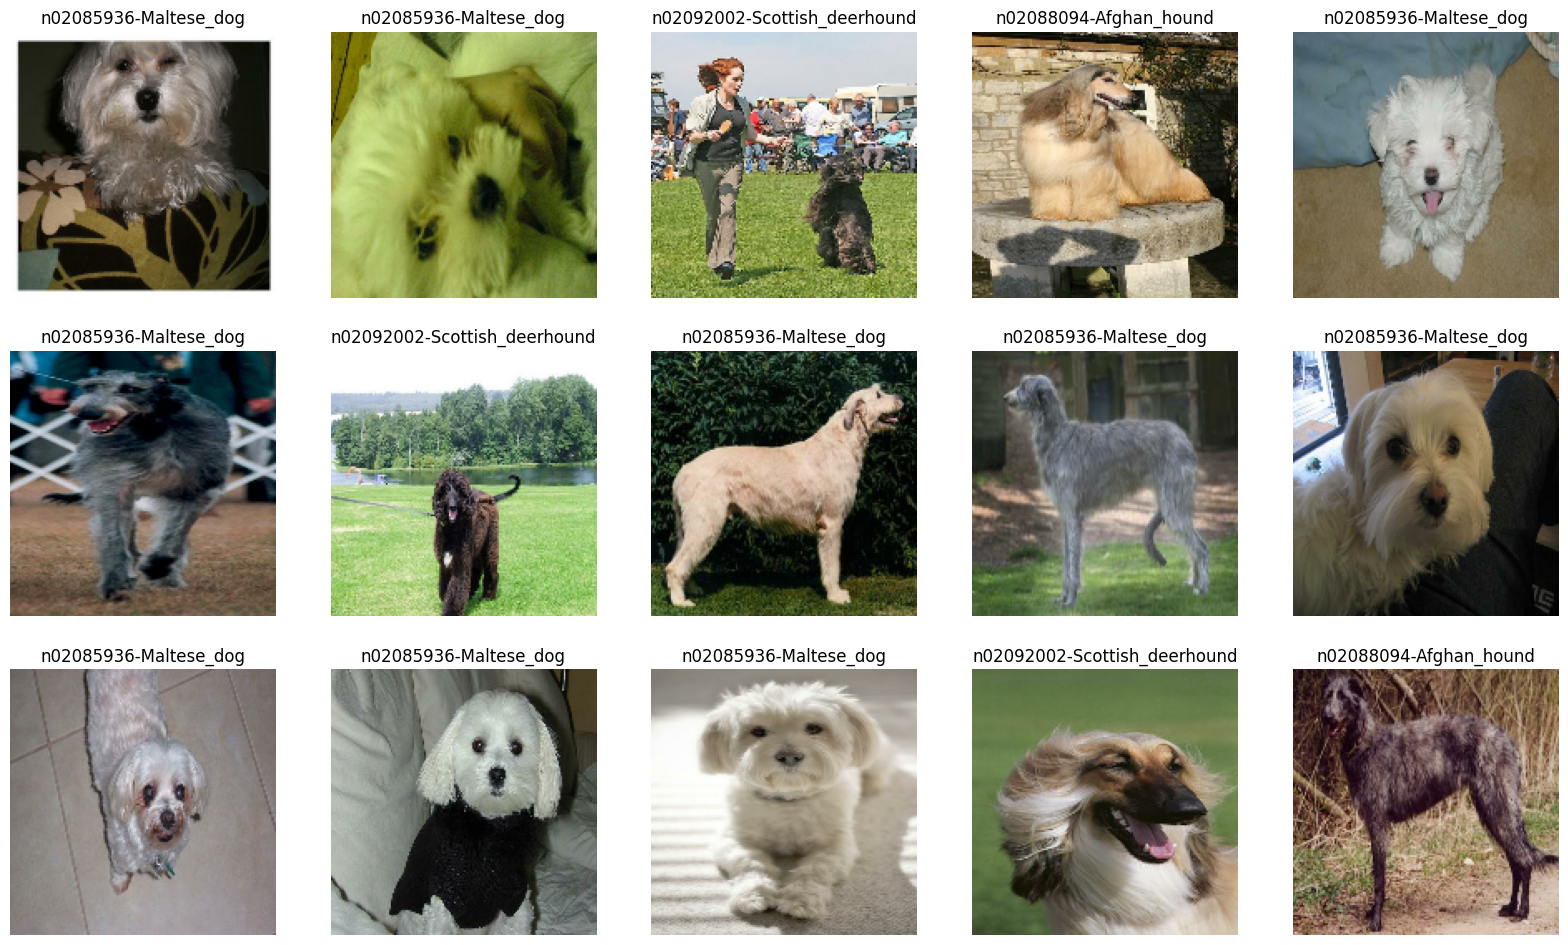

In [ ]:
# Récupérer un lot d'images du jeu de test
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
 
# Obtenir les prédictions brutes (logits) du modèle
logits = model.predict_on_batch(image_batch)

# Appliquer la fonction softmax pour convertir les logits en probabilités
probabilities = tf.nn.softmax(logits, axis=-1)

# Obtenir les classes prédites en sélectionnant l'indice avec la probabilité maximale
predicted_classes = tf.argmax(probabilities, axis=-1)

print('Probabilités par classe :\n', probabilities.numpy())
print('Classes prédites :\n', predicted_classes.numpy())
print('Labels réels :\n', label_batch)

# Affichage des images avec leur classe prédite
plt.figure(figsize=(20, 20))
for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    # Affiche le nom de la classe prédite
    plt.title(class_names[predicted_classes[i].numpy()])
    plt.axis("off")
plt.show()

In [231]:
model.save('saved_model/dog_breed_mobilenet_3.keras') 